# CAR-SALES dataset

Dữ liệu `car-sales.csv`: bộ dữ liệu chứa thông tin các ôtô cũ ở một cửa hàng bán ô tô cũ. 

Bạn hãy thực hiện các yêu cầu sau:


In [17]:
%pip install networkx



                                              0.0/1.6 MB ? eta -:--:--
                                              0.0/1.6 MB 991.0 kB/s eta 0:00:02
     -----                                    0.2/1.6 MB 3.0 MB/s eta 0:00:01
     ------------                             0.5/1.6 MB 4.1 MB/s eta 0:00:01
     --------------------------               1.1/1.6 MB 7.0 MB/s eta 0:00:01
     ---------------------------------------- 1.6/1.6 MB 8.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


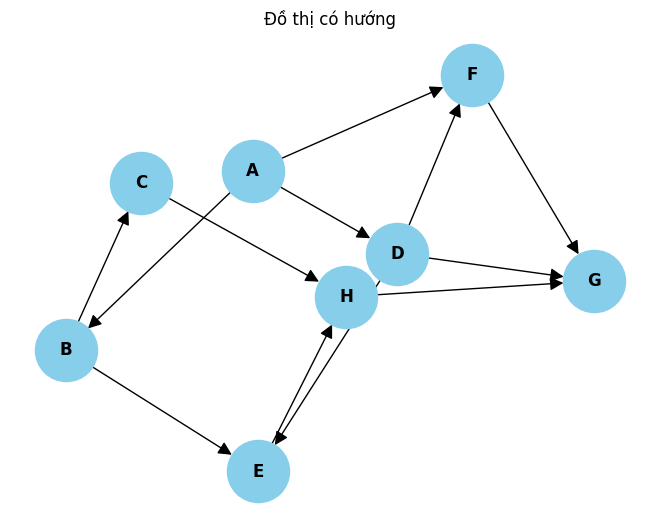

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Tạo đồ thị
G = nx.DiGraph()

# Thêm các cạnh và nút
edges = [('A', 'F'), ('A', 'D'), ('A', 'B'), ('B', 'C'), ('B', 'E'), ('C', 'H'), ('D', 'F'), ('D', 'G'), ('D', 'E'), ('E', 'H'), ('H', 'G'), ('F', 'G')]
G.add_edges_from(edges)

# Vẽ đồ thị
pos = nx.spring_layout(G)  # Sắp xếp các nút
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=12, font_weight="bold", arrowsize=20)
plt.title("Đồ thị có hướng")
plt.show()


In [19]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    print("Duyệt:", start, "Visited:", visited)

    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)

# Đồ thị có hướng được biểu diễn dưới dạng dictionary
graph = {
    'A': ['F', 'D', 'B'],
    'B': ['C', 'E'],
    'C': ['H'],
    'D': ['F', 'G', 'E'],
    'E': ['H'],
    'F': ['G'],
    'G': [],
    'H': ['G']
}

# Bắt đầu DFS từ đỉnh 'A'
print("DFS traversal:")
dfs(graph, 'A')


DFS traversal:
Duyệt: A Visited: {'A'}
Duyệt: F Visited: {'F', 'A'}
Duyệt: G Visited: {'G', 'F', 'A'}
Duyệt: D Visited: {'G', 'F', 'A', 'D'}
Duyệt: E Visited: {'F', 'A', 'E', 'D', 'G'}
Duyệt: H Visited: {'F', 'A', 'E', 'D', 'H', 'G'}
Duyệt: B Visited: {'F', 'A', 'E', 'D', 'B', 'H', 'G'}
Duyệt: C Visited: {'F', 'A', 'E', 'D', 'B', 'H', 'C', 'G'}


In [9]:
import pandas as pd
df = pd.read_csv(r'D:\Học tập\Qui học năm 2\Kì 2\Thống kê máy tính và ứng dụng\data\car-sales.csv')
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_4976\903778039.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Manufacturer,Colour,Odometer,Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


### 1. Đọc dữ liệu và cho biết dữ liệu có bao nhiêu dòng, bao nhiêu cột

Đáp án: (10 dòng, 5 cột)

In [5]:
# Your code here
print(f'Kích thước dữ liệu: {df.shape}')

Kích thước dữ liệu: (10, 5)


### 2. Cho biết thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng

In [6]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  10 non-null     object 
 1   Colour        10 non-null     object 
 2   Odometer      10 non-null     int64  
 3   Doors         10 non-null     int64  
 4   Price         10 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 528.0+ bytes


### 3. Trong dữ liệu có thông tin của bao nhiêu xe?

Đáp án: 10 xe

In [50]:
len(df)


10

### 4. Đếm số xe theo theo hãng

Đáp án: Toyota: 10 xe, Honda: 3 xe, Nissan: 2 xe, BMW: 1 xe

In [19]:
# Your code here
df['Manufacturer'].value_counts()

Toyota    4
Honda     3
Nissan    2
BMW       1
Name: Manufacturer, dtype: int64

### 5. Đếm số xe theo màu


In [22]:
# Your code here
df['Colour'].value_counts()

White    4
Blue     3
Green    1
Black    1
Red      1
Name: Colour, dtype: int64

### 6. Tổng giá trị các xe trong cửa hàng

Đáp án: 76450 USD


In [54]:
# Your code here
s = sum(df.Price)
s

76450.0

### 7. Top 3 xe có giá cao nhất


In [12]:
# Your code here
df.sort_values('Price',ascending=False).head(3)



,Manufacturer,Colour,Odometer,Doors,Price
3,BMW,Black,11179,5,22000.0
9,Nissan,White,31600,4,9700.0
6,Honda,Blue,45698,4,7500.0


### 8. Top 3 xe đã chạy nhiều cây số (km)nhất (Odometer)

Đáp án:
- Xe Nissan, White, 213095 km
- Xe Toyota, White, 150043 km
- Xe Toyota, Green, 99213 km

In [11]:
# Your code here
df.sort_values('Odometer',ascending=False).head(3)

,Manufacturer,Colour,Odometer,Doors,Price
4,Nissan,White,213095,4,3500.0
0,Toyota,White,150043,4,4000.0
5,Toyota,Green,99213,4,4500.0


### 9. Khảo sát xe của hãng Honda

- Tính tỷ lệ xe Honda trong dữ liệu của cửa hàng (0.3)
- Cho biết giá trung bình của xe hãng Honda của cửa hàng (6500)
- Cho biết các xe của hãng Honda trong cửa hàng có những màu sắc nào (Red, Blue)

In [23]:
# Your code here
honda_survey = df[df['Manufacturer'] == 'Honda']
ratio_honda = len(honda_survey) / len(df)
print(f"{ratio_honda:}")
average_price_honda = honda_survey['Price'].mean()
print(f"{average_price_honda}")
honda_colors = honda_survey['Colour'].unique()
print(f"{', '.join(honda_colors)}")

0.3
6500.0
Red, Blue


# 10. Tính toán các giá trị sau của  thuộc tính giá ('Price')

- Giá trung bình các xe (7645)
- Giá trị trung vị các xe (6625)
- Miền giá trị của xe (18500)
- Miền phân vị của xe (2750)
- Điểm phân vị 0.4 và 0.6 của giá ([5750, 7000])

In [27]:
# Your code here
average_price = df['Price'].mean()
print(f"{average_price}")
median_price = df['Price'].median()
print(f"{median_price}")
price_range = df['Price'].max() - df['Price'].min()
print(f"{price_range}")
percentile_range = df['Price'].quantile(0.75) - df['Price'].quantile(0.25)
print(f"{percentile_range}")
quantile_04 = df['Price'].quantile(0.4)
print(f"{quantile_04}")
quantile_06 = df['Price'].quantile(0.6)
print(f"{quantile_06}")

7645.0
6625.0
18500.0
2750.0
5750.0
7000.0


---

# TIPS dataset

Dữ liệu chứa trong file `tips.csv` chứa thông tin tiền tip của khách hàng tại một nhà hàng. Dữ liệu có các thông tin sau:

- `total_bill`: tổng hoá đơn (USD)
- `tip`: tiền tip/ tiền boa (USD)
- `sex`: giới tính người thanh toán hóa đơn
- `smoker`: có hút thuốc hay không
- `day`: ngày trong tuần
- `time`: thời gian dùng bữa(buổi sáng, buổi trưa, buổi tối)
- `size`: số lượng người tham gia

Bạn hãy thực hiện thống kê mô tả để tìm hiểu về hành vi tip của khách hàng tại nhà hàng

1. Đọc dữ liệu


In [29]:
# Your code here
df = pd.read_csv(r'D:\Học tập\Qui học năm 2\Kì 2\Thống kê máy tính và ứng dụng\data\tips.csv')
df

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


2. Xoá cột `Unnamed: 0`


In [30]:
# Your code here
df.drop(columns='Unnamed: 0')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.


In [69]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng


In [70]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?


In [34]:
# Your code here
count_by_sex = df['sex'].value_counts()
print(f"{count_by_sex['Male']}")
print(f"{count_by_sex['Female']}")
print(f"{count_by_sex['Male'] / count_by_sex['Female']}")

157
87
1.8045977011494252


6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?


In [35]:
# Your code here
count_smokers = df['smoker'].value_counts()
print(f"{count_smokers['Yes']}")
print(f"{count_smokers['Yes'] / len(df)}")


93
0.38114754098360654


7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?


In [37]:
# Your code here
most_visited_day = df['day'].value_counts().idxmax()
visit_percentage = df['day'].value_counts(normalize=True).max()
print(f"{most_visited_day}")
print(f"{visit_percentage:}")


Sat
0.35655737704918034


8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?


In [32]:
# Your code here
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?


In [78]:
# Your code here
max(df['size'].value_counts())

156

10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?

In [36]:
# Your code here

average_party_size = df['size'].mean()
print(f"{average_party_size}")


2.569672131147541


---